<a href="https://colab.research.google.com/github/BirukovAlex/neto_Python/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%B8_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%C2%BB_%D0%BE%D0%B1%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Датасет Iris
Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

# 2. Логистическая регрессия
-логистическая регрессия, без использования метода LogisticRegression из библиотеки.

в работе представлены 3 разных класса с методами:
- градиентный спуск (MyLogisticRegression)
- скользящее среднее (MySGDLogisticRegression)
- Нестеров (NADAMLogisticRegression)

такая реализация позводяет использовать классы по отдельности

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Accuracy: 1.00
Weights: [ 3.88041453 -3.01698781]
Bias: 0.5211500757128754
Время небиблиотечной реализации: 1.430511474609375e-06
Accuracy sklearn: 1.00
Время библиотечной реализации: 0.010904788970947266


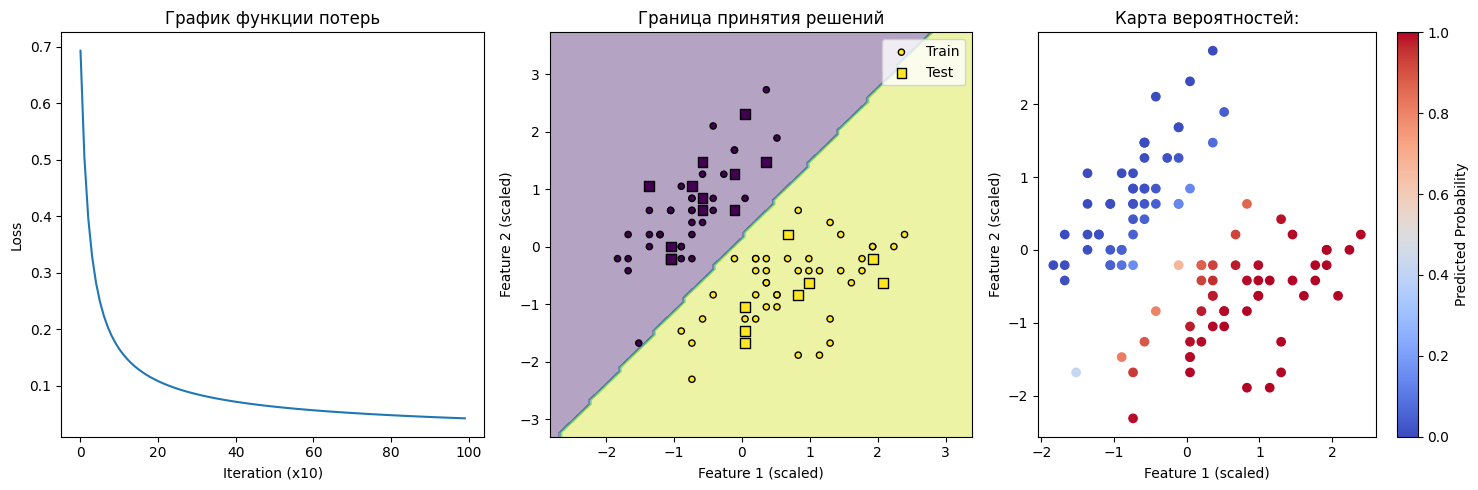

In [ ]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            # Линейная комбинация весов и признаков + смещение
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для получения вероятностей
            y_pred = self._sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Обновляем параметры
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Сохраняем значение функции потерь для визуализации
            if i % 10 == 0:
                loss = self._compute_loss(y, y_pred)
                self.loss_history.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return [1 if p >= threshold else 0 for p in probabilities]

def load_and_prepare_data():
    iris = load_iris()
    # Берем только 2 класса (setosa и versicolor) и 2 признака
    X = iris.data[:100, :2]  # Берем первые 100 samples и 2 features
    y = iris.target[:100]    # Берем target для первых 100 samples

    # Нормализация данных
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, scaler

def train_and_visualize():
    X, y, scaler = load_and_prepare_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация и обучение модели
    model = MyLogisticRegression(learning_rate=0.1, n_iterations=1000)
    model.fit(X_train, y_train)

    # Предсказание и оценка
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # время небиблиотечной реализации
    start_train = time.time()
    train_time = time.time() - start_train

    # Оценка sklearn LogisticRegression для сравнения
    sk_model = LogisticRegression()
    start_train = time.time()
    sk_model.fit(X_train, y_train)
    sk_train_time = time.time() - start_train
    start_pred = time.time()
    sk_y_pred = sk_model.predict(X_test)
    sk_pred_time = time.time() - start_pred
    sk_accuracy = accuracy_score(y_test, sk_y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Weights: {model.weights}")
    print(f"Bias: {model.bias}")
    print(f"Время небиблиотечной реализации: {train_time}")

    print(f"Accuracy sklearn: {sk_accuracy:.2f}")
    print(f"Время библиотечной реализации: {sk_train_time}")

    # Визуализация
    plt.figure(figsize=(15, 5))

    # 1. График функции потерь
    plt.subplot(1, 3, 1)
    plt.plot(range(len(model.loss_history)), model.loss_history)
    plt.xlabel('Iteration (x10)')
    plt.ylabel('Loss')
    plt.title('График функции потерь')

    # 2. Визуализация данных и границы решения
    plt.subplot(1, 3, 2)

    # Сетка для построения границы решения
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Предсказания для точек сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    # Контур границы решения
    plt.contourf(xx, yy, Z, alpha=0.4)
    # Обучающие точки
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', label='Train')
    # Тестовые точки
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', marker='s', label='Test')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title('Граница принятия решений')
    plt.legend()

    # 3. Визуализация вероятностей
    plt.subplot(1, 3, 3)
    proba = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], c=proba, cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar(label='Predicted Probability')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title('Карта вероятностей:')

    plt.tight_layout()
    plt.show()

    return model

if __name__ == "__main__":
    model = train_and_visualize()

**График функции потерь:**
- Показывает как уменьшается значение функции потерь с каждой итерацией
- Позволяет оценить сходимость алгоритма

**Граница принятия решений:**
- Отображает разделяющую поверхность, которую нашла модель
- Точки обучения показаны кружками, тестовые - квадратами
- Цвета соответствуют истинным классам

**Карта вероятностей:**
- Показывает предсказанные вероятности для всех точек. **Тепловая карта (coolwarm)** - синий для класса 0, красный для класса 1
Цветовая шкала показывает вероятность принадлежности к классу 1

# 4. Метода скользящего среднего
(Root Mean Square Propagation, RMSProp).

Accuracy: 1.00
Weights: [ 5.23452377 -3.80044474]
Bias: 0.8201091909775484
Время реализации: 4.76837158203125e-07


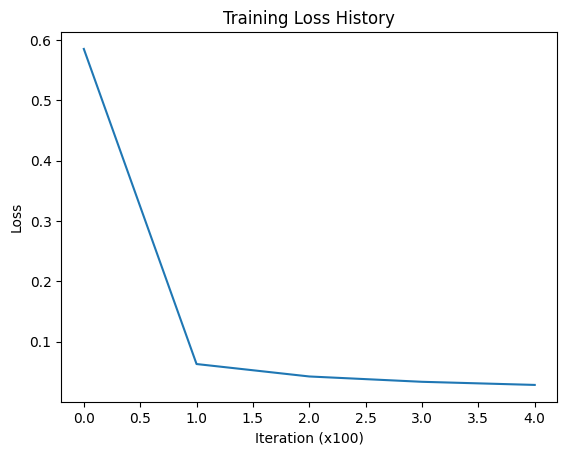

In [ ]:
class MySGDLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        # Функция потерь (логарифмические потери)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.n_iterations):
            # Создаем мини-батчи
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                # Берем текущий мини-батч
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Вычисляем предсказания для батча
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self._sigmoid(linear_model)

                # Вычисляем градиенты для батча
                dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
                db = (1 / self.batch_size) * np.sum(y_pred - y_batch)

                # Обновляем параметры
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Для визуализации сохраняем значение функции потерь
            if iteration % 100 == 0:
                y_pred_full = self._sigmoid(np.dot(X, self.weights) + self.bias)
                loss = self._compute_loss(y, y_pred_full)
                self.loss_history.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return [1 if p >= threshold else 0 for p in probabilities]

# Загрузка и подготовка данных
def load_and_prepare_data():
    iris = load_iris()
    # Берем только 2 класса и 2 признака для бинарной классификации
    X = iris.data[:100, :2]  # Первые 100 samples, 2 features
    y = iris.target[:100]    # Target для первых 100 samples

    # Нормализация данных
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, scaler

# Обучение и оценка модели
def train_and_evaluate():
    X, y, scaler = load_and_prepare_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация и обучение модели с SGD
    model = MySGDLogisticRegression(learning_rate=0.1, n_iterations=500, batch_size=16)
    model.fit(X_train, y_train)

    # время реализации
    start_train = time.time()
    train_time = time.time() - start_train

    # Предсказание и оценка
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


    print(f"Accuracy: {accuracy:.2f}")
    print(f"Weights: {model.weights}")
    print(f"Bias: {model.bias}")
    print(f"Время реализации: {train_time}")

    return model

if __name__ == "__main__":
    model = train_and_evaluate()

    # Визуализация изменения функции потерь
    import matplotlib.pyplot as plt
    plt.plot(range(len(model.loss_history)), model.loss_history)
    plt.xlabel('Iteration (x100)')
    plt.ylabel('Loss')
    plt.title('Training Loss History')
    plt.show()

# 5. Ускоренный по Нестерову метод адаптивной оценки моментов
(Nesterov–accelerated Adaptive Moment Estimation, Nadam).

Accuracy: 1.00
Weights: [ 5.23440736 -3.80064185]
Bias: 0.8203367629263049
Время реализации: 4.76837158203125e-07


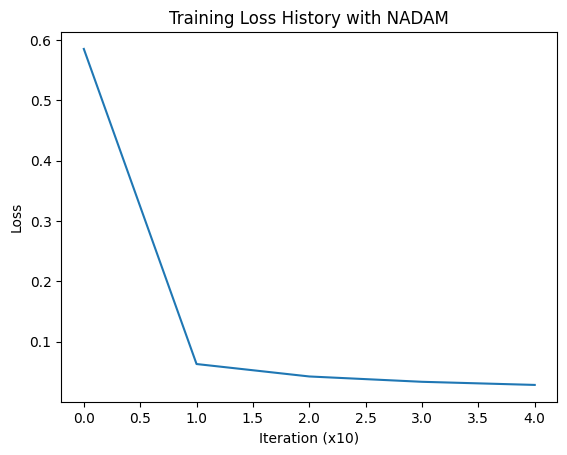

In [ ]:
class NADAMLogisticRegression:
    def __init__(self, learning_rate=0.001, n_iterations=1000, batch_size=32,
                 beta1=0.9, beta2=0.999, epsilon=1e-8, nesterov=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.beta1 = beta1  # Для первого момента (среднее)
        self.beta2 = beta2  # Для второго момента (нецентрированная дисперсия)
        self.epsilon = epsilon
        self.nesterov = nesterov
        self.weights = None
        self.bias = None
        self.loss_history = []

        # Для моментов
        self.m_weights = None
        self.v_weights = None
        self.m_bias = None
        self.v_bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        # Добавляем небольшой эпсилон для численной стабильности
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def _initialize_moments(self, n_features):
        self.m_weights = np.zeros(n_features)
        self.v_weights = np.zeros(n_features)
        self.m_bias = 0
        self.v_bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0
        self._initialize_moments(n_features)

        for iteration in range(1, self.n_iterations + 1):
            # Создаем мини-батчи
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                # Берем текущий мини-батч
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Предиктивный шаг Нестерова
                if self.nesterov:
                    # Временное обновление параметров с lookahead
                    m_weights_hat = self.m_weights / (1 - self.beta1 ** iteration)
                    v_weights_hat = self.v_weights / (1 - self.beta2 ** iteration)
                    weights_lookahead = self.weights - self.learning_rate * m_weights_hat / (np.sqrt(v_weights_hat) + self.epsilon)

                    m_bias_hat = self.m_bias / (1 - self.beta1 ** iteration)
                    v_bias_hat = self.v_bias / (1 - self.beta2 ** iteration)
                    bias_lookahead = self.bias - self.learning_rate * m_bias_hat / (np.sqrt(v_bias_hat) + self.epsilon)

                    # Вычисляем градиенты в точке lookahead
                    linear_model = np.dot(X_batch, weights_lookahead) + bias_lookahead
                else:
                    linear_model = np.dot(X_batch, self.weights) + self.bias

                y_pred = self._sigmoid(linear_model)
                error = y_pred - y_batch

                # Вычисляем градиенты
                dw = (1 / self.batch_size) * np.dot(X_batch.T, error)
                db = (1 / self.batch_size) * np.sum(error)

                # Обновляем моменты
                self.m_weights = self.beta1 * self.m_weights + (1 - self.beta1) * dw
                self.v_weights = self.beta2 * self.v_weights + (1 - self.beta2) * (dw ** 2)

                self.m_bias = self.beta1 * self.m_bias + (1 - self.beta1) * db
                self.v_bias = self.beta2 * self.v_bias + (1 - self.beta2) * (db ** 2)

                # Коррекция bias (начальные шаги)
                m_weights_hat = self.m_weights / (1 - self.beta1 ** iteration)
                v_weights_hat = self.v_weights / (1 - self.beta2 ** iteration)

                m_bias_hat = self.m_bias / (1 - self.beta1 ** iteration)
                v_bias_hat = self.v_bias / (1 - self.beta2 ** iteration)

                # Обновление параметров
                self.weights -= self.learning_rate * m_weights_hat / (np.sqrt(v_weights_hat) + self.epsilon)
                self.bias -= self.learning_rate * m_bias_hat / (np.sqrt(v_bias_hat) + self.epsilon)

            # Сохраняем значение функции потерь для визуализации
            if iteration % 10 == 0:
                y_pred_full = self._sigmoid(np.dot(X, self.weights) + self.bias)
                loss = self._compute_loss(y, y_pred_full)
                self.loss_history.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return [1 if p >= threshold else 0 for p in probabilities]

# Загрузка и подготовка данных
def load_and_prepare_data():
    iris = load_iris()
    # Берем только 2 класса и 2 признака для бинарной классификации
    X = iris.data[:100, :2]  # Первые 100 samples, 2 features
    y = iris.target[:100]    # Target для первых 100 samples

    # Нормализация данных
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, scaler

# Обучение и оценка модели
def NADAM_train_and_evaluate():
    X, y, scaler = load_and_prepare_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация и обучение модели с NADAM
    model = NADAMLogisticRegression(learning_rate=0.01, n_iterations=500,
                                  batch_size=16, nesterov=True)
    model.fit(X_train, y_train)

    # время реализации
    start_train = time.time()
    NADAM_train_time = time.time() - start_train

    # Предсказание и оценка
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Weights: {model.weights}")
    print(f"Bias: {model.bias}")
    print(f"Время реализации: {NADAM_train_time}")

    return model

if __name__ == "__main__":
    model = train_and_evaluate()

    # Визуализация изменения функции потерь
    import matplotlib.pyplot as plt
    plt.plot(range(len(model.loss_history)), model.loss_history)
    plt.xlabel('Iteration (x10)')
    plt.ylabel('Loss')
    plt.title('Training Loss History with NADAM')
    plt.show()

# 6. Вывод
Все модели отработали с одинаковой точностью 1,00

Время реализации:
- библиотечная логистичиская регрессия - 0.010
- ручная логистическая регрессия - 1.43
- метод скользящего среднего - 1.19
- Нестеров - 4.76

все методы работают корректно